# EDA

In [230]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [231]:
# Load train test split 
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")


In [232]:
#make a copy of original  data

train_original = train.copy()
test_original = test.copy()

In [233]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [234]:
test_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [235]:
train.shape, test.shape

((614, 13), (367, 12))

In [236]:
train.dtypes

Loan_ID                  str
Gender                   str
Married                  str
Dependents               str
Education                str
Self_Employed            str
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area            str
Loan_Status              str
dtype: object

In [237]:
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    str    
 1   Gender             601 non-null    str    
 2   Married            611 non-null    str    
 3   Dependents         599 non-null    str    
 4   Education          614 non-null    str    
 5   Self_Employed      582 non-null    str    
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    str    
 12  Loan_Status        614 non-null    str    
dtypes: float64(4), int64(1), str(8)
memory usage: 62.5 KB


# Univariate Analysis

In [238]:
#Target Variables
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [239]:
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

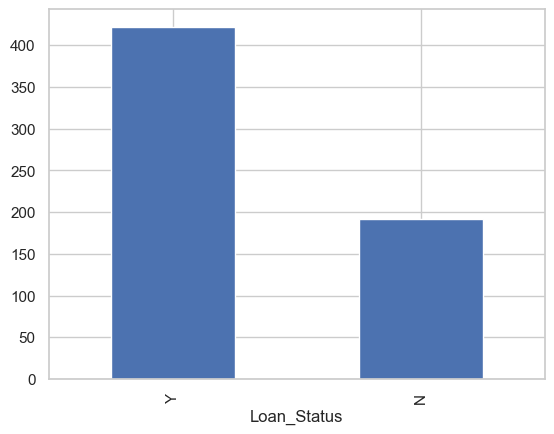

In [240]:
train['Loan_Status'].value_counts().plot.bar()

In [241]:
train[train.columns[-1]].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [242]:
values_count = pd.DataFrame(columns=train.columns,data=train.value_counts())
values_count

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


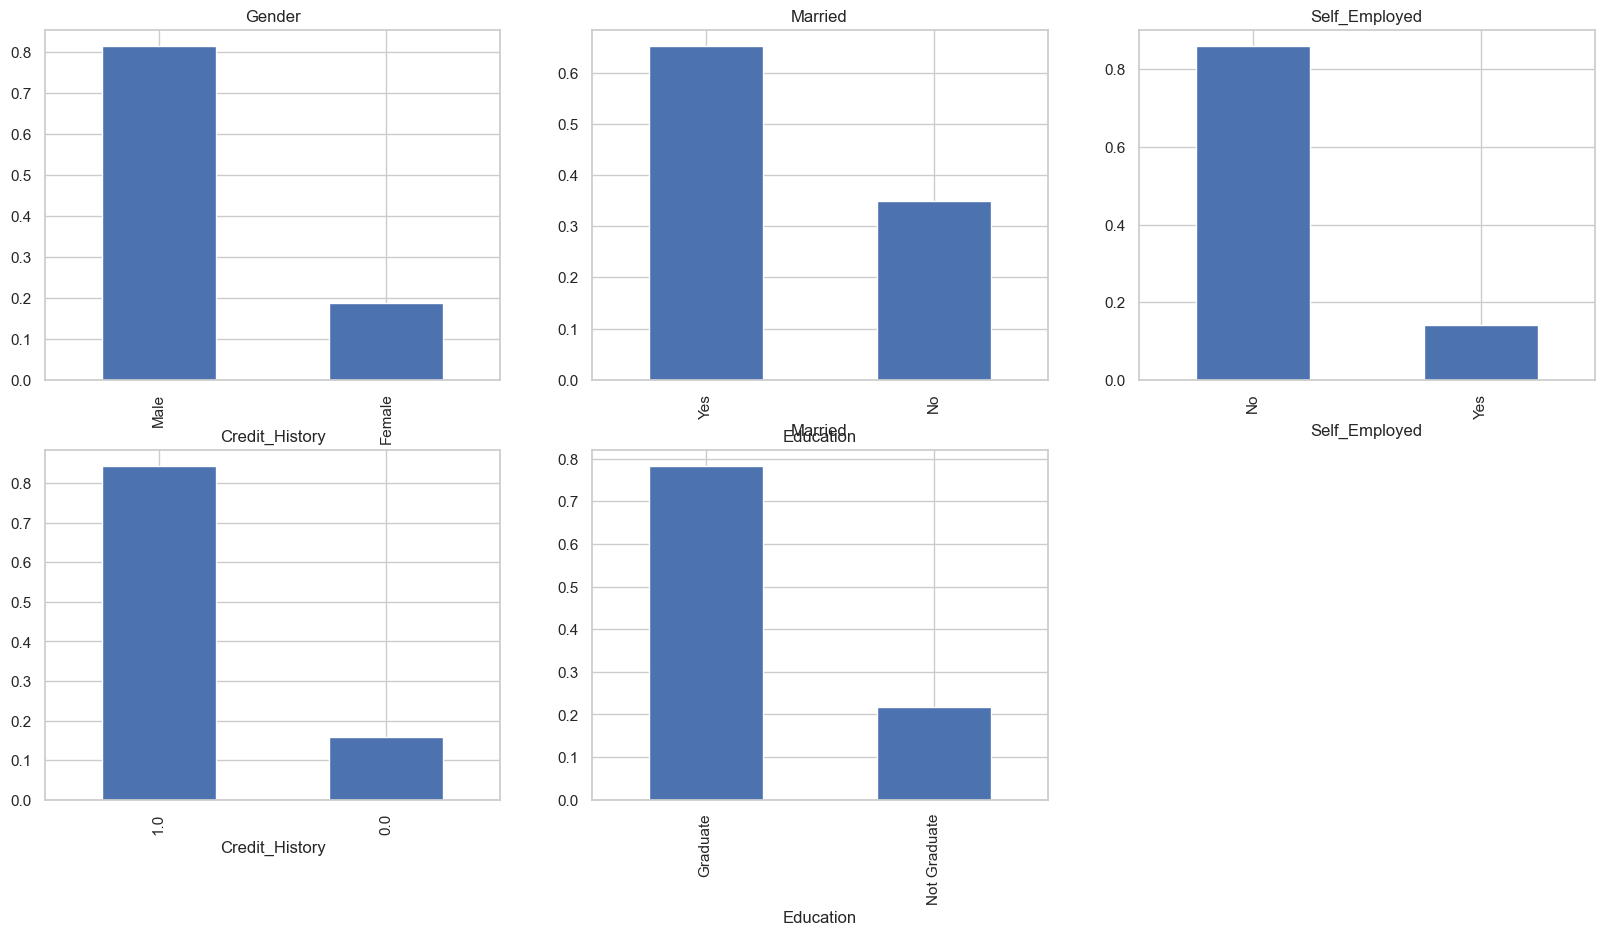

In [243]:
# Independent Variable (Categorical)
"""There are 5 features that are categorical or binary 
(Gender, Married, Self_Employed, Credit_History, Education)"""
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Gender")
plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Married")
plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Self_Employed")
plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Credit_History")
plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= "Education")

plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have credit history (repaid their debts).
Around 80% of the applicants are Graduate.

# Independent Variable (Ordinal)
There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

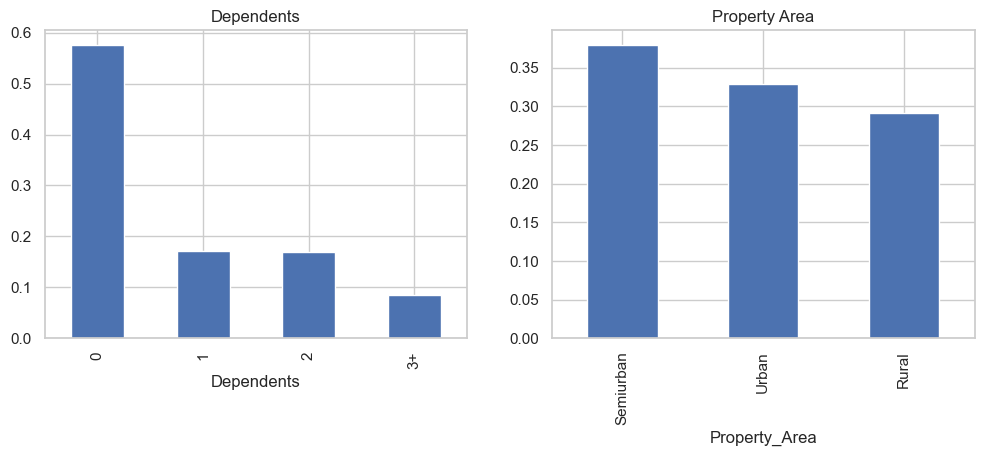

In [244]:
#visualizing Remaining Categorical Variable
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4),title="Dependents")

plt.subplot(122)
train["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(12,4), title = "Property Area")
plt.show()

In [245]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

# Independent Variable (Numerical)
There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

<Axes: >

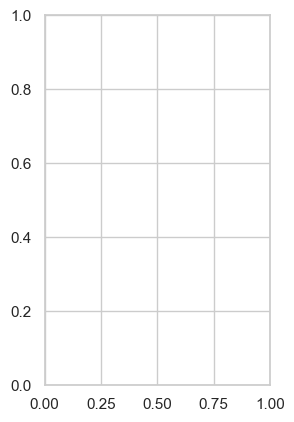

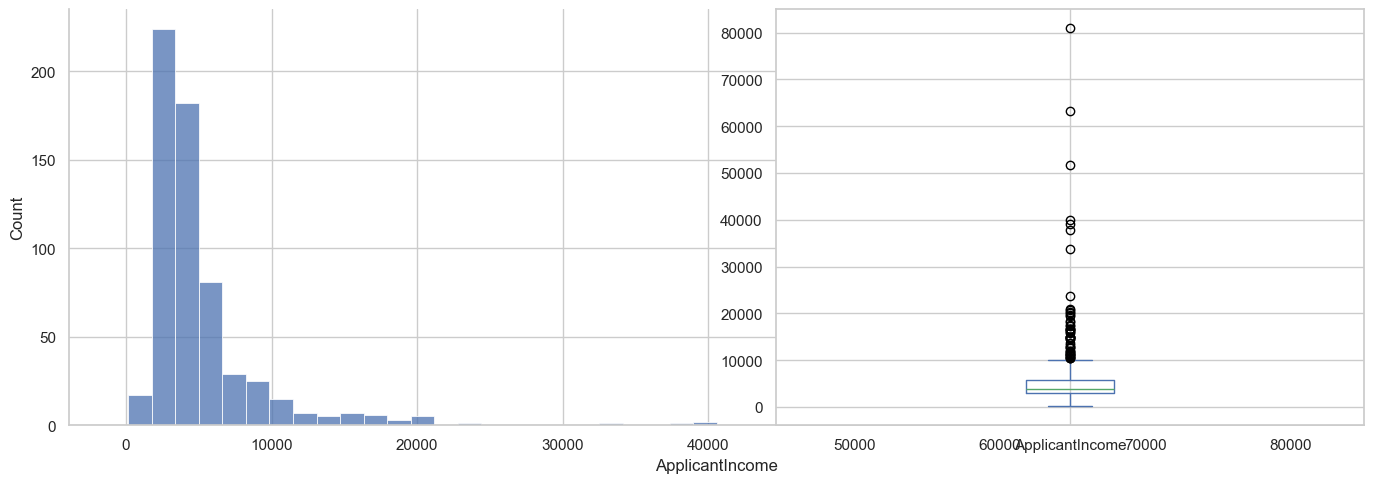

In [246]:
# Visualizing ApplicantIncome
plt.subplot(121)
sns.displot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

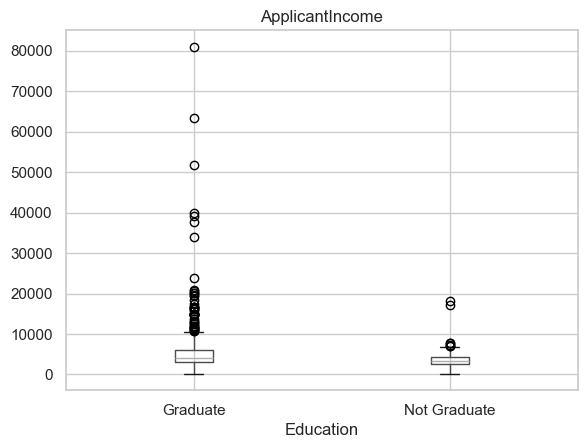

In [247]:
train.boxplot(column="ApplicantIncome", by ='Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, *which are appearing to be the outliers*.

Secondly, Let’s look at the Coapplicant income distribution.

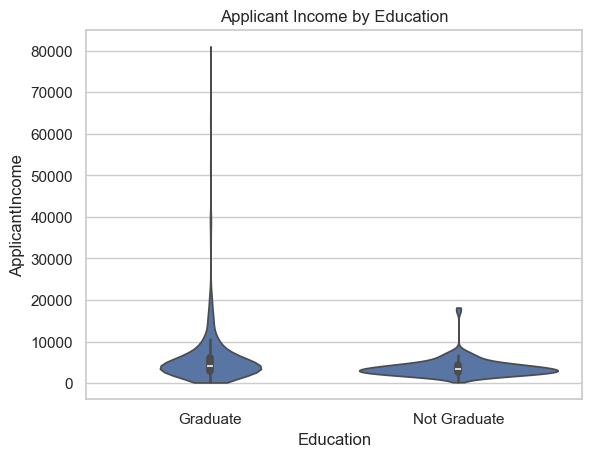

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.violinplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    inner="box",
    cut=0
)

plt.title("Applicant Income by Education")
plt.show()

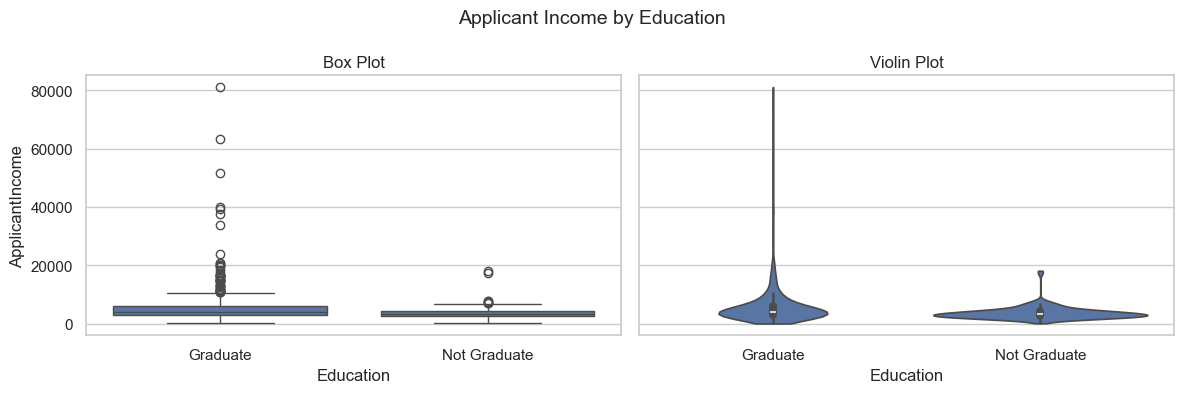

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Box plot
sns.boxplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    ax=axes[0]
)
axes[0].set_title("Box Plot")

# Violin plot
sns.violinplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    inner="box",
    cut=0,
    ax=axes[1]
)
axes[1].set_title("Violin Plot")

plt.suptitle("Applicant Income by Education", fontsize=14)
plt.tight_layout()
plt.show()


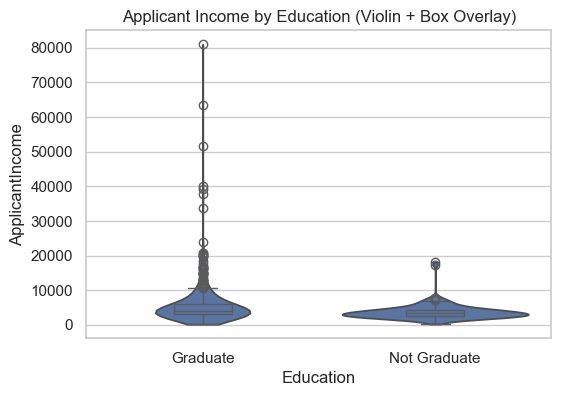

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

# Violin (background)
sns.violinplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    inner=None,   # remove internal markings
    cut=0
)

# Box plot (overlay)
sns.boxplot(
    x="Education",
    y="ApplicantIncome",
    data=train,
    width=0.25,   # thinner box so violin is visible
    showcaps=True,
    boxprops={"facecolor": "none"},  # transparent box
    showfliers=True
)

plt.title("Applicant Income by Education (Violin + Box Overlay)")
plt.show()


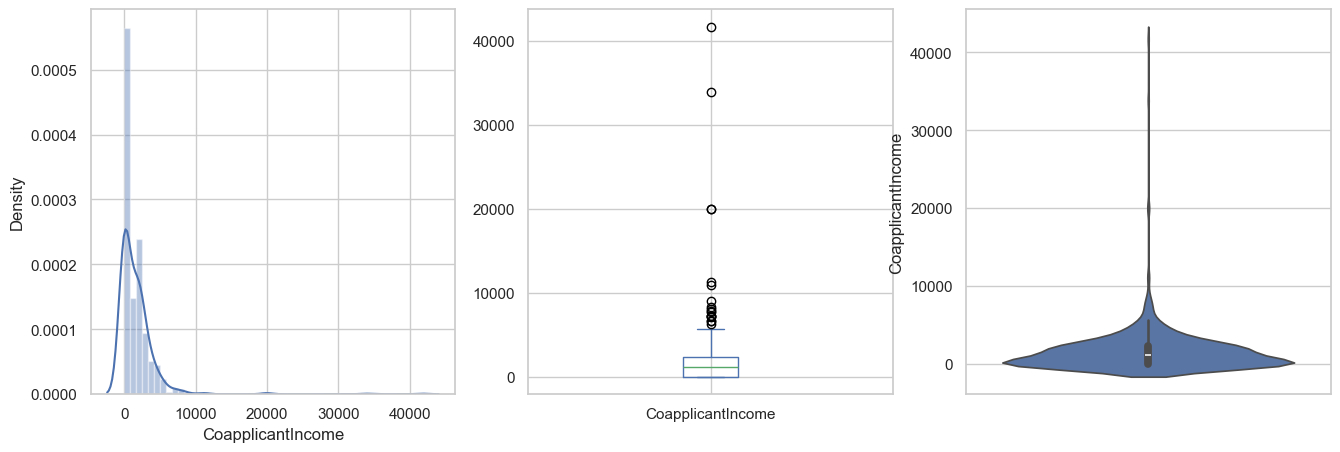

In [251]:
# plt.figure(1)
plt.subplot(131)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.subplot(133)
sns.violinplot(y=train['CoapplicantIncome'])


plt.show()

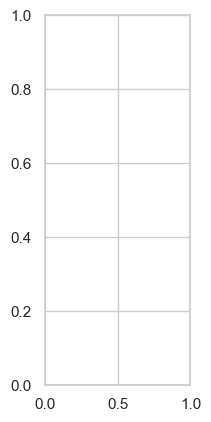

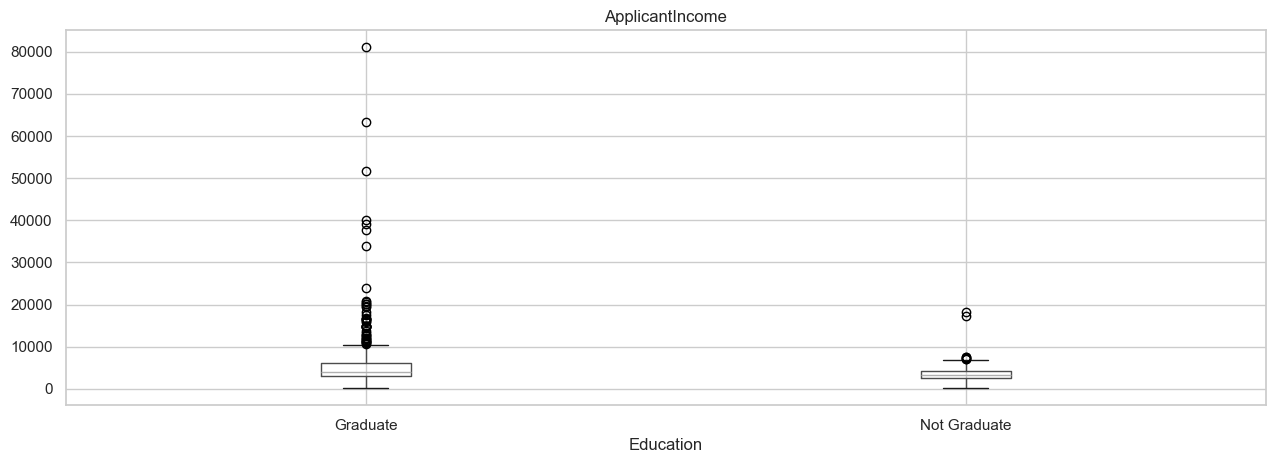

In [252]:
plt.subplot(131)
train.boxplot(column="ApplicantIncome", by = "Education", figsize=(15,5))
plt.suptitle("")
plt.show()

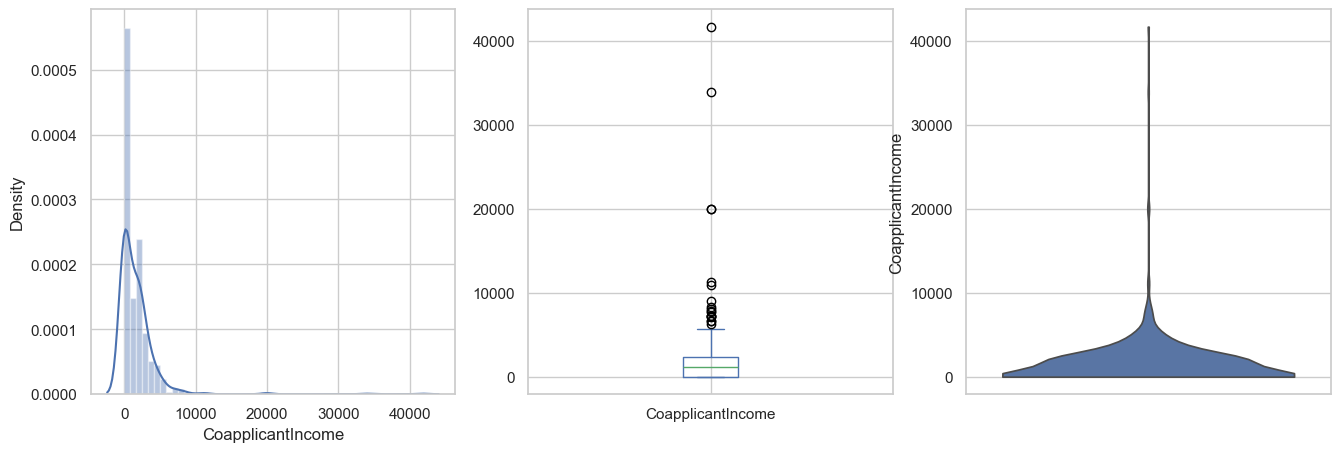

In [253]:
# plt.figure(1)
plt.subplot(131)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.subplot(133)

sns.violinplot(y = train['CoapplicantIncome'], inner=None,cut=0)

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Thirdly, let’s look at the distribution of LoanAmount variable.

In [254]:
train['LoanAmount'].isnull().sum()

np.int64(22)

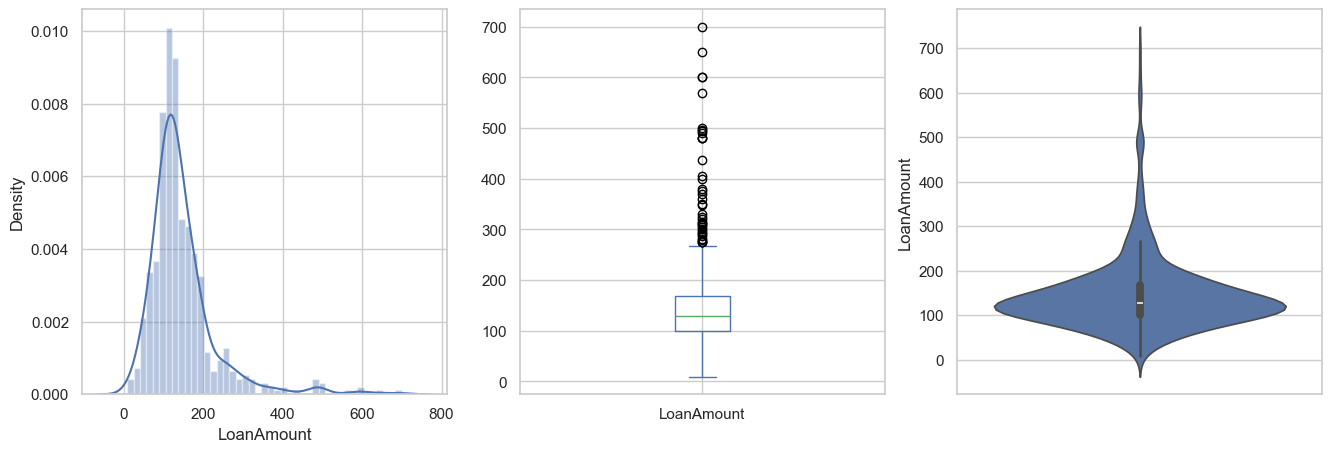

In [255]:
plt.subplot(131)
sns.distplot(train['LoanAmount'])
plt.subplot(132)
train['LoanAmount'].plot.box(figsize  = (16,5))
plt.subplot(133)
sns.violinplot(y=train['LoanAmount'])
plt.show()

In [256]:
df = train.dropna()

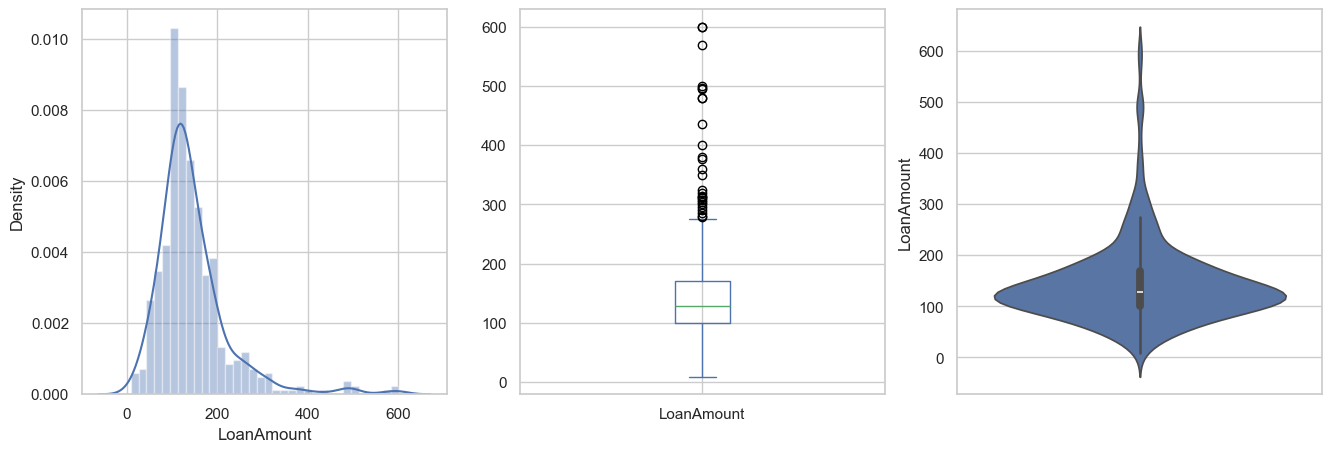

In [257]:
plt.subplot(131)
sns.distplot(df['LoanAmount'])
plt.subplot(132)
df['LoanAmount'].plot.box(figsize  = (16,5))
plt.subplot(133)
sns.violinplot(y=df['LoanAmount'])
plt.show()

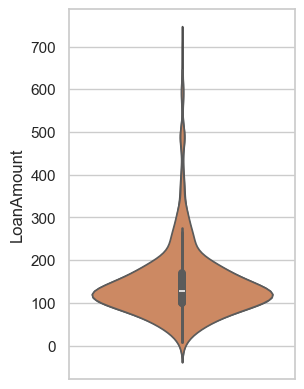

In [258]:
plt.subplot(121)
sns.violinplot(y =train['LoanAmount'])
plt.subplot(121)
sns.violinplot(y = df['LoanAmount'])
plt.show()

We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [259]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [260]:
import matplotlib.pyplot as plt

print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

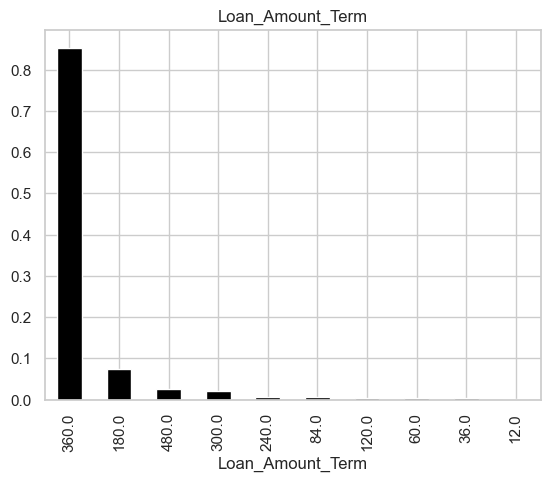

In [261]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title='Loan_Amount_Term',colormap= 'nipy_spectral')
plt.show()

It can be inferred from the above bar plot that:

Around 85% of the loans are 360 months term or 30 years period
Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

You have ONE Series

Pandas treats it as one data series

Colormaps apply across multiple series, not across individual bars of a single Series

So Pandas does this internally:

“One series → one color”

# Bivariate Analysis
After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. We can use bivariate analysis to test the hypotheses that we generated earlier.

**Categorical Independent Variable vs Target Variable**

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

**Contingency table**

Why It Is Used
1️⃣ Exploratory Data Analysis (EDA)

To understand relationship between two categorical variables.

Here:

Does loan approval depend on gender?

This helps detect:

Bias

Imbalance

Trends

Discrimination patterns

2️⃣ Before Feature Engineering

If strong differences exist, you might:

Encode carefully

Create interaction features

Investigate fairness

3️⃣ For Statistical Testing

You can use this table for:

Chi-Square Test of Independence

In [262]:
print(pd.crosstab(train['Gender'], train['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


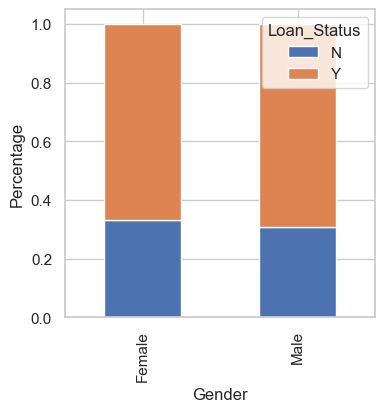

In [263]:
print(pd.crosstab(train['Gender'], train['Loan_Status']))
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,figsize=(4,4)) # Gender/n(Gender) form
plt.xlabel("Gender")
p=plt.ylabel("Percentage")

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


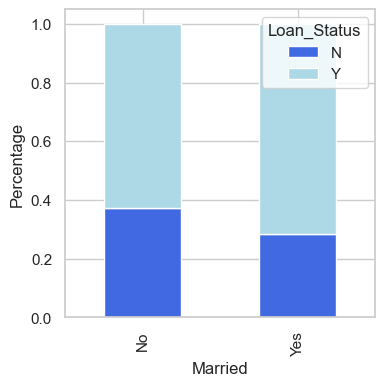

In [264]:
print(pd.crosstab(train['Married'],train['Loan_Status']))
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4),color=['royalblue','lightblue'])
plt.xlabel("Married")
P = plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


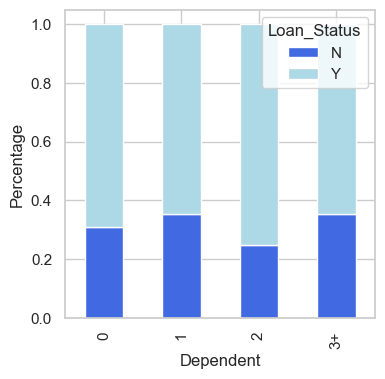

In [265]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))
Dependent = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependent.div(Dependent.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True, figsize=(4,4), color=['royalblue','lightblue'])
plt.xlabel('Dependent')
p = plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


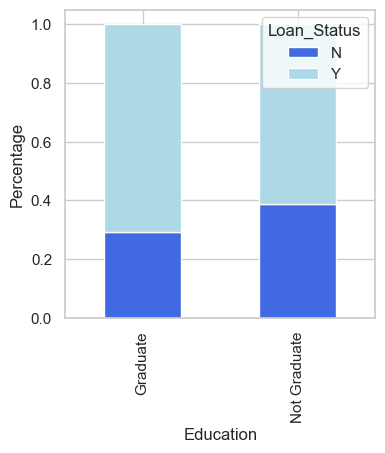

In [266]:
print(pd.crosstab(train['Education'],train['Loan_Status']))
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['royalblue','lightblue'],figsize=(4,4))
plt.xlabel("Education")
p = plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


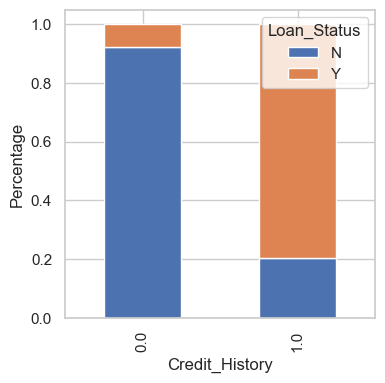

In [267]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


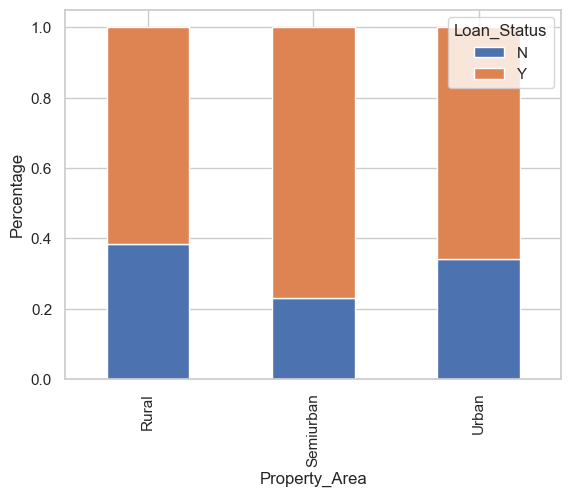

In [268]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

From the bar charts above, it can be inferred that:

* proportion of male and female applicants is more or less same for both approved and unapproved loans
* proportion of married applicants is higher for the approved loans
* distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
* there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
* proportion of loans getting approved for graduates is higher compared to non-graduates
* it seems people with credit history as 1 are more likely to get their loans approved
* proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

## Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


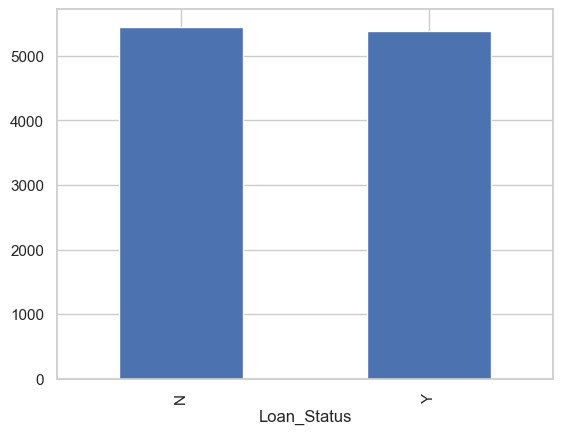

In [269]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

| Aspect      | `groupby().mean()`                     | `pd.crosstab()`                     |
| ----------- | -------------------------------------- | ----------------------------------- |
| Purpose     | Aggregate **numerical** data by groups | Count **categorical** combinations  |
| Input types | Categorical → Numerical                | Categorical → Categorical           |
| Output      | Mean / sum / median / etc.             | Frequency table (contingency table) |
| Typical use | Feature–target relationship            | Category–category relationship      |
| Stats usage | Compare averages                       | Chi-square / association tests      |



Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicant (5384 vs 5446).

So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [270]:
#making bins for applcant variable income
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [271]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very High    39   73


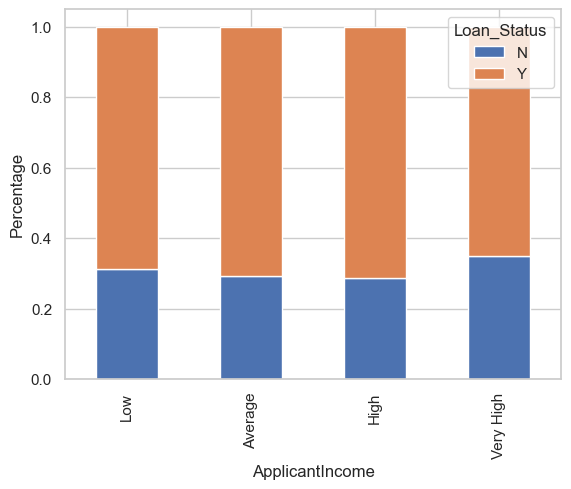

In [272]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [273]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [274]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

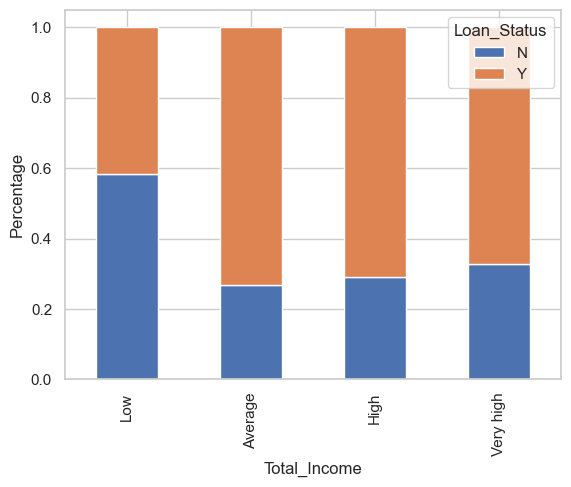

In [275]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. This is more consistent with our hypothesis with applicants with high income will have more chances of loan approval.

Let’s visualize the Loan amount variable.

## Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.



Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<Axes: xlabel='Loan_Status'>

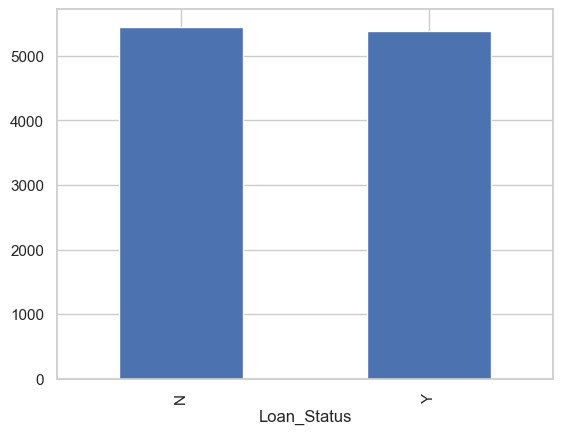

In [276]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicant (5384 vs 5446).

So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [277]:
# making bins for applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low', 'Average', 'High','Very High']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [278]:
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,6000.0,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High,9613.0,Very high
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low,3849.0,Average
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average,5540.0,High


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very High    39   73


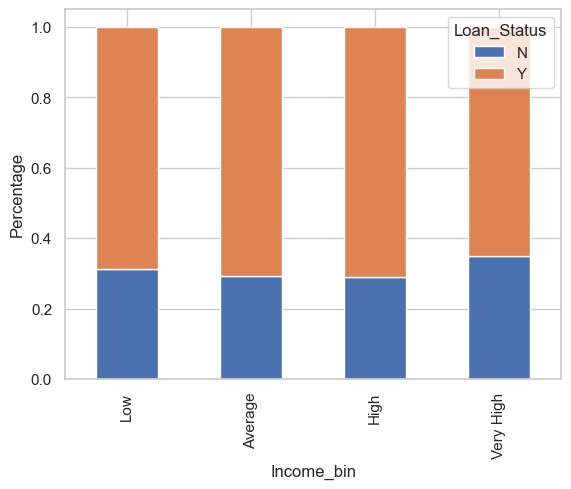

In [279]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel("Income_bin")
p = plt.ylabel("Percentage")
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the Coapplicant income and loan amount variable in similar manner.

In [280]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

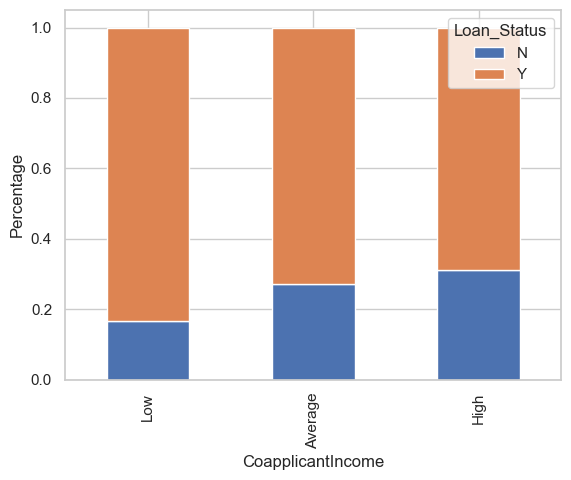

In [281]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [282]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [283]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

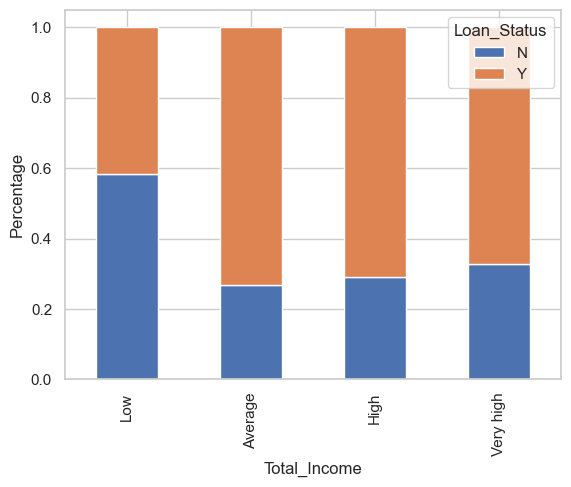

In [284]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. This is more consistent with our hypothesis with applicants with high income will have more chances of loan approval.

Let’s visualize the Loan amount variable.

In [285]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

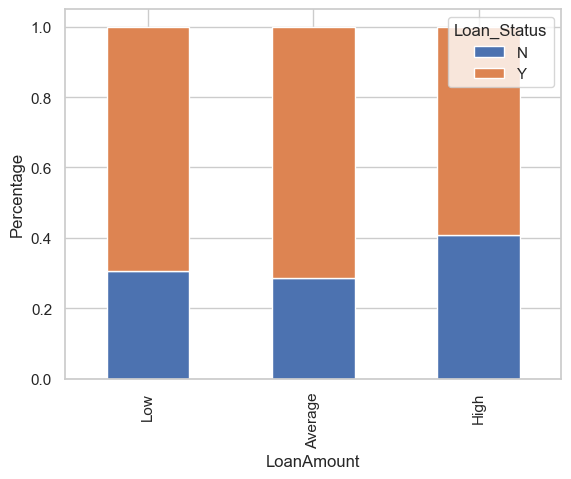

In [286]:
# plot the chart 
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part.

In [287]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Total_Income,Total_Income_bin,Coapplicant_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0,High,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,6091.0,Very high,Average,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Average,NaN,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,High,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,6000.0,High,NaN,Average


In [288]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [289]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [290]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+',3, inplace=True)

0      0
1      1
2      2
3      2
4      0
      ..
362    3
363    0
364    0
365    0
366    0
Name: Dependents, Length: 367, dtype: object

In [291]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

0      1
1      N
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    N
Name: Loan_Status, Length: 614, dtype: object

In [292]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

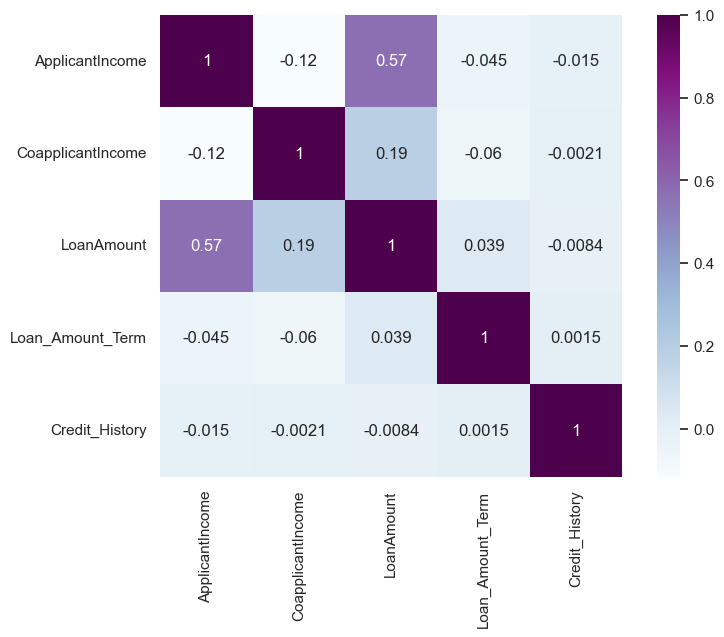

In [293]:
#Calculate and visualize corelation matrix
matrix=train.select_dtypes(include='number').corr()
plt.figure(figsize=(9,6))
sns.heatmap(matrix,vmax=1,square=True,cmap="BuPu",annot=True)
plt.show()

In [294]:
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


**Note:** We see that the most correlated variables are

(ApplicantIncome - LoanAmount) with correlation coefficient of 0.57

(Credit_History - Loan_Status) with correlation coefficient of 0.56

LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

# Data Pre-processing

Data pre-processing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data pre-processing is a method of resolving such issues.

**Missing value and outlier treatment**

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

**Missing value imputation**

Let’s list out feature-wise count of missing values.

In [295]:
# Check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode.

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [296]:
# replace missing values with the mode
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [297]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [298]:
# Replacing missing values with the mode
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

In [299]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [300]:
train['Loan_Amount_Term'].isnull().sum()

np.int64(0)


Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [301]:
# replace missing values with the median value due to outliers
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())

In [302]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


As we can see that all the missing values have been filled in the Train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

**Note:** We need to replace the missing values in Test set using the mode/median/mean of the Training set, not from the Test set. Likewise, if you remove values above some threshold in the test case, make sure that the threshold is derived from the training and not test set. Make sure to calculate the mean (or any other metrics) only on the train data to avoid data leakage to your test set.

In [303]:
# Replacing missing values in test dataset with the mode/Median/Mean of Train
test['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
test['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].median())
test['Married'] = train['Married'].fillna(train['Married'].mode()[0])
test['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
test['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
test['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
test['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [304]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Outlier Treatment
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Having outliers in the dataset often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

**Due to these outliers bulk of the data in** *"the loan amount is at the left and the right tail is longer"*. This is called right skewness (or positive skewness). One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of **log transformation**. We will do the similar changes to the test file simultaneously.

Text(0.5, 1.0, 'Test')

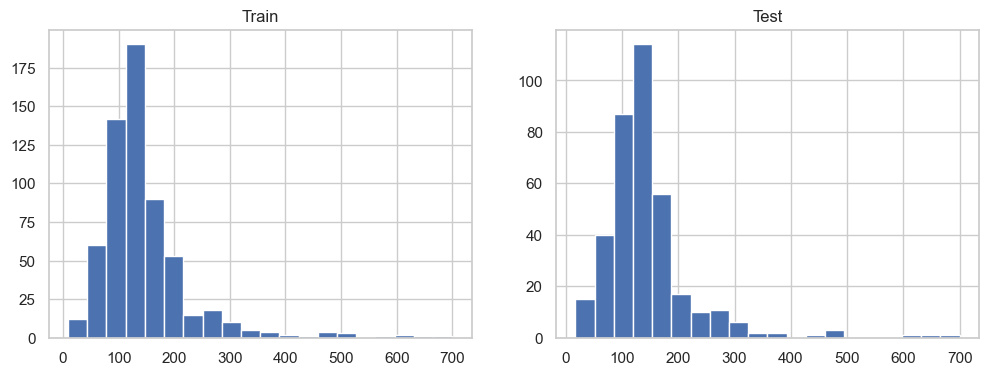

In [306]:
# Before log transformation
ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20,figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20,figsize=(12,4))
ax2.set_title("Test")

In [307]:
# Removing the skewness in LoanAmount variable using log transformation 
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Text(0.5, 1.0, 'Test')

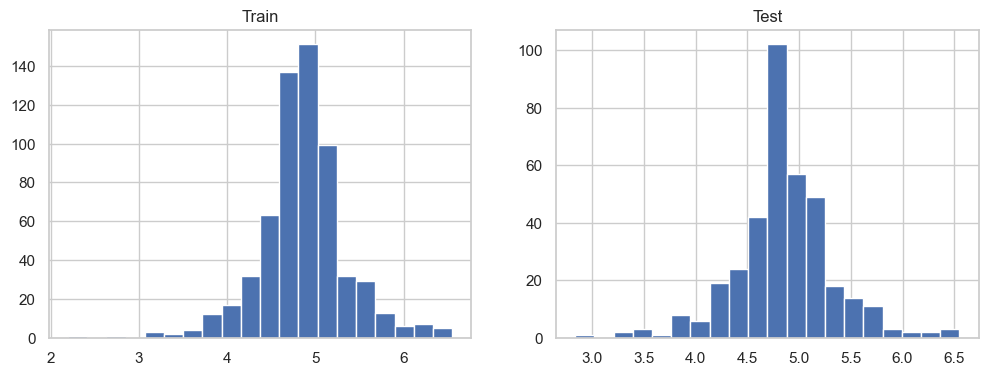

In [309]:
# Before log transformation
ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20,figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20,figsize=(12,4))
ax2.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.